In [ ]:
#Mahesh Kumar

In [5]:
#importing all required libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.corpus  import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [6]:
#loading the dataset and viewing 1'st record
import pandas as pd
reviews = pd.read_csv("nltk_movie_reviews.csv")
reviews.head(1)

,movie_review,sentiment
0,"plot : two teen couples go to a church party ,...",neg


In [7]:
#Downloading and storing stop words for data preprocessing
from nltk.corpus import stopwords
nltk.download("stopwords")
sw = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MAHESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#User-defined function to clean the strings
def clean_text(text):
    #Tokenize and lowercase
    tokens = text.lower().split()
    # Remove punctuation,keep only letters
    tokens = [re.sub("[^A-Za-z]","",el) for el in tokens]
    # Remove stopwords
    tokens = [el for el in tokens if el not in sw]
    return " ".join(tokens)

In [10]:
#Pythonize way of applying functions to a dataframe
reviews["clean_txt"]  = reviews.movie_review.apply(clean_text)
reviews.head(2)

,movie_review,sentiment,clean_txt
0,"plot : two teen couples go to a church party ,...",neg,plot two teen couples go church party drink ...
1,the happy bastard ' s quick movie review damn ...,neg,happy bastard quick movie review damn yk bug ...


In [66]:
#Deploying tfidf on tokens in the corpus and printing it using a dataframe
vect = CountVectorizer()
vect.fit(reviews.clean_txt)
reviews_dtm = vect.transform(reviews.clean_txt)
reviews_dtm_df  = pd.DataFrame(reviews_dtm.toarray(),columns=vect.get_feature_names())
reviews_dtm_df.head(2)

,aa,aaa,aaaaaaaaah,aaaaaaaahhhh,aaaaaah,aaaahhhs,aahs,aaliyah,aalyah,aamir,...,zukovsky,zulu,zundel,zurg,zus,zweibel,zwick,zwigoff,zycie,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#initializing Naïve Bayes Classifier
nb = MultinomialNB()

In [48]:
#Splitting the data into train and test sets
X = reviews_dtm_df.values
y = reviews.sentiment
X_train1, X_test1, y_train1, y_test1  = train_test_split(X, y,test_size=0.80,random_state=1)#sampled into 20% training and 80% test
X_train2, X_test2, y_train2, y_test2  = train_test_split(X, y,test_size=0.10,random_state=1)#sampled into 90% training and 10% test

In [49]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(400, 38791)
(1600, 38791)
(400,)
(1600,)


In [50]:
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(1800, 38791)
(200, 38791)
(1800,)
(200,)


In [84]:
#80%
nb.fit(X_train1,y_train1)
y_pred_class1 = nb.predict(X_test1)
print("****************Model with data sampled into 20% training and 80% test****************")
print("\nAccuracy of the model is: {:.2f}".format(metrics.accuracy_score(y_test1,y_pred_class1)))
print("Confusion Matrix Looks like:\n",metrics.confusion_matrix(y_test1,y_pred_class1,labels=["pos","neg"]))
print("\nRecall for 'positive' class: {:.2f}".format(metrics.recall_score(y_test1.values,y_pred_class1,pos_label="pos")))
print("\nRecall for 'negative' class: {:.2f}".format(metrics.recall_score(y_test1.values,y_pred_class1,pos_label="neg")))
print("\nPrecision for 'positive' class: {:.2f}".format(metrics.precision_score(y_test1.values,y_pred_class1,pos_label="pos")))
print("\nPrecision for 'negative' class: {:.2f}".format(metrics.precision_score(y_test1.values,y_pred_class1,pos_label="neg")))

****************Model with data sampled into 20% training and 80% test****************

Accuracy of the model is: 0.76
Confusion Matrix Looks like:
 [[654 135]
 [249 562]]

Recall for 'positive' class: 0.83

Recall for 'negative' class: 0.69

Precision for 'positive' class: 0.72

Precision for 'negative' class: 0.81


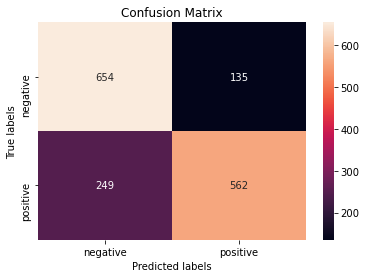

In [85]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  

cm = confusion_matrix(y_test1,y_pred_class1,labels=["pos","neg"])
ax= plt.subplot()
sns.heatmap(cm, annot=True,fmt="d", ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [86]:
#90%
nb.fit(X_train2,y_train2)
y_pred_class2 = nb.predict(X_test2)
print("****************Model with data sampled into 90% training and 10% test****************")
print("\nAccuracy of the model is: {:.2f}".format(metrics.accuracy_score(y_test2,y_pred_class2)))
print("Confusion Matrix Looks like:\n",metrics.confusion_matrix(y_test2,y_pred_class2,labels=["pos","neg"]))
print("\nRecall for 'positive' class: {:.2f}".format(metrics.recall_score(y_test2.values,y_pred_class2,pos_label="pos")))
print("\nRecall for 'negative' class: {:.2f}".format(metrics.recall_score(y_test2.values,y_pred_class2,pos_label="neg")))
print("\nPrecision for 'positive' class: {:.2f}".format(metrics.precision_score(y_test2.values,y_pred_class2,pos_label="pos")))
print("\nPrecision for 'negative' class: {:.2f}".format(metrics.precision_score(y_test2.values,y_pred_class2,pos_label="neg")))

****************Model with data sampled into 90% training and 10% test****************

Accuracy of the model is: 0.77
Confusion Matrix Looks like:
 [[74 28]
 [19 79]]

Recall for 'positive' class: 0.73

Recall for 'negative' class: 0.81

Precision for 'positive' class: 0.80

Precision for 'negative' class: 0.74


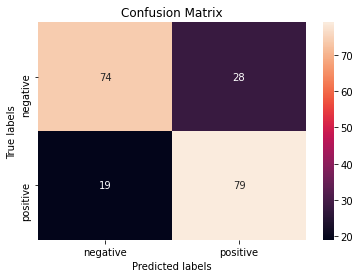

In [87]:
#Plotting the confusion matrix
cm = confusion_matrix(y_test2,y_pred_class2,labels=["pos","neg"])
ax= plt.subplot()
sns.heatmap(cm, annot=True,fmt="d", ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [88]:
#Interpretation
### ->Q>Interpret recall, precision, and accuracy

### ->A> Recall is the ability of the model to accurately calculate the actual class (0,1) row-wise 
###      Recall refers to the percentage of total relevant results correctly classified by your algorithm

### ->A> Precision is the ability of the model to accurately predict the predicted class (0,1) column-wise
###      Precision refers to the percentage of your results which are relevant

### ->A> Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the 
###      total observations. Accuracy is how accurate the model is in predicting predicted class using actual class (diagonals 
###      where actual class = predicted class)

### ->Q>Provide a real-world example which would make optimizing recall very important. What about optimizing precision? 
### ->Q>And accuracy? 

### ->A> Any kind of application where falsely predicting an actual class would be catastropic. Let's say our job is to classify the 
###      amount of impact required for an air bag to be deployed by the car. If the model get's this wrong, there could be loss  
###      of lives 

### ->A> An application where if we predict the predict class incorrectly, the worse that will happen is thatour model was wrong.
###      Assuming our job is predicting/classifying the winner of the Presidential Election, if our precision is wrong, then 
###      our output will be wrong
### 
### ->A> If the accuracy is wrong, it could be catastrophic. Many of these high speed manned aerial vehicles use models  
###      run on accuracy. An error of even 1 basis point could lead to system failure and ultimately loss of life.  

In [89]:
##########Q2

In [90]:
X = reviews_dtm_df.values
y = reviews["sentiment"]
X_train, X_test, y_train, y_test  = train_test_split(X, y,random_state=1)

In [91]:
X_train.shape
X_test.shape

(500, 38791)

In [92]:
from sklearn import svm
SVM = svm.SVC(C=1.0,kernel='linear')
SVM.fit(X_train,y_train)

SVC(kernel='linear')

In [93]:
predictions_SVM = SVM.predict(X_test)
print(metrics.accuracy_score(predictions_SVM,y_test))

0.81


In [94]:
print("\nRecall for 'positive' class: {:.2f}".format(metrics.recall_score(predictions_SVM,y_test,pos_label="pos")))
print("\nRecall for 'negative' class: {:.2f}".format(metrics.recall_score(predictions_SVM,y_test,pos_label="neg")))
print("\nPrecision for 'positive' class: {:.2f}".format(metrics.precision_score(predictions_SVM,y_test,pos_label="pos")))
print("\nPrecision for 'negative' class: {:.2f}".format(metrics.precision_score(predictions_SVM,y_test,pos_label="neg")))


Recall for 'positive' class: 0.79

Recall for 'negative' class: 0.83

Precision for 'positive' class: 0.83

Precision for 'negative' class: 0.79


In [ ]:
# Looking at the performance metrics - accuracy, recall, and precision; SVM performs better than NBC
#This makes sense intutively also because NBC is 'naive' when it uses the prior probability